In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

institutions = pd.read_csv('/Users/kaylibrownstein/general_assembly_dat/flatworld_sales/institutions.csv')

institutions.head()

# I've only included institutions from the IPEDS database that have FlatWorld student orders.

,name,COUNT(*),unitid,institution name,year,HD2017.FIPS state code,DRVADM2017.Percent admitted - total,DRVADM2017.Admissions yield - total,DRVADM2017.Admissions yield - women,DRVADM2017.Admissions yield - part time,...,"SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17","SFA1617.Average net price-students awarded grant or scholarship aid, 2016-17_2",SFA1617.Number of students in full-year cohort,SFA1617.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,SFA1617.Number of full-time first-time undergraduates awarded any financial aid,SFA1617.Percent of full-time first-time undergraduates awarded any financial aid_2,"SFA1617.Average amount of federal, state, local or institutional grant aid awarded_2",SFA1617.Average amount of federal grant aid awarded to full-time first-time undergraduates,"DRVGR2017.Graduation rate, total cohort","DRVEF122017.12-month unduplicated headcount, undergraduate: 2016-17"
0,Abilene Christian University,162,222178,Abilene Christian University,2017,Texas,58.0,16.0,15.0,1.0,...,NaN,27175.0,NaN,993.0,967.0,97.0,18599.0,4506.0,61.0,3806.0
1,Abraham Baldwin Agricultural College,2,138558,Abraham Baldwin Agricultural College,2017,Georgia,70.0,65.0,64.0,12.0,...,8022.0,NaN,NaN,919.0,806.0,88.0,5432.0,4817.0,23.0,4012.0
2,Academy College,1,172866,Academy College,2017,Minnesota,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,63.0,149.0
3,Access Careers - Hempstead,1,483708,Access Careers,2017,New York,NaN,NaN,NaN,NaN,...,NaN,NaN,34.0,34.0,33.0,97.0,5091.0,5091.0,22.0,552.0
4,Ace Cosmetology and Barber Training Center,1,480736,Ace Cosmetology and Barber Training Center,2017,Connecticut,NaN,NaN,NaN,NaN,...,NaN,16475.0,11.0,11.0,9.0,82.0,5515.0,5515.0,100.0,37.0


In [4]:
print("There are {} rows and {} columns.".format(institutions.shape[0], institutions.shape[1]))

print("The column names are: {}".format(institutions.columns.tolist()))

institutions = institutions.rename(columns={'COUNT(*)': 'student orders'})

institutions.rename(columns=lambda x: x.split('.')[-1], inplace=True)

columns_to_drop = ['name', 'year', 'Average net price-students awarded grant or scholarship aid, 2016-17', 
                   'Average net price-students awarded grant or scholarship aid, 2016-17_2', 
                   'Admissions yield - women', 'Average amount of federal, state, local or institutional grant aid awarded_2', 
                   'Percent of full-time first-time undergraduates awarded any financial aid_2',
                   'Total price for in-district students living on campus  2017-18', 
                   'Total price for in-state students living on campus 2017-18'
                  ]

institutions = institutions.drop(columns_to_drop, axis=1, errors='ignore')
 
print(institutions.shape)

print(institutions.describe())

print(institutions.dtypes)

There are 1112 rows and 34 columns.
The column names are: ['name', 'COUNT(*)', 'unitid', 'institution name', 'year', 'HD2017.FIPS state code', 'DRVADM2017.Percent admitted - total', 'DRVADM2017.Admissions yield - total', 'DRVADM2017.Admissions yield - women', 'DRVADM2017.Admissions yield - part time', 'DRVIC2017.Tuition and fees, 2016-17', 'DRVIC2017.Total price for in-district students living on campus  2017-18', 'DRVIC2017.Total price for in-state students living on campus 2017-18', 'HD2017.Sector of institution', 'HD2017.Level of institution', 'DRVEF2017.Total  enrollment', 'DRVEF2017.Full-time enrollment', 'DRVEF2017.Part-time enrollment', 'SFA1617.Percent of full-time first-time undergraduates awarded any financial aid', 'SFA1617.Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid', 'SFA1617.Average amount of federal, state, local or institutional grant aid awarded', 'SFA1617.Percent of full-time first-time undergraduates awarded

In [482]:
# I want to see null values in aggregate.
institutions.isnull().sum()

null_df = pd.DataFrame(institutions.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
print(null_df.sort_values(['Count of Nulls'], ascending=False).head(10))

# The "Number of students in full-year cohort" column is so rarely used, I'm going to remove it. 
# I don't think it is full enough to contribute much value.

if 'Number of students in full-year cohort' in institutions.columns:
    institutions.drop(columns=['Number of students in full-year cohort'], inplace=True)

institutions.isnull().sum()

                                                    Count of Nulls
Column                                                            
Number of students in full-year cohort                        1094
Admissions yield - total                                       451
Admissions yield - part time                                   451
Percent admitted - total                                       450
Average amount of other student loans awarded t...             289
Tuition and fees, 2016-17                                       73
Average amount of federal grant aid awarded to ...              66
Graduation rate, total cohort                                   65
Average amount of federal, state, local or inst...              65
Percent of full-time first-time undergraduates ...              59


Column
student orders                                                                                               0
unitid                                                                                                       0
institution name                                                                                             0
FIPS state code                                                                                              0
Percent admitted - total                                                                                   450
Admissions yield - total                                                                                   451
Admissions yield - part time                                                                               451
Tuition and fees, 2016-17                                                                                   73
Sector of institution                                                                                    

In [483]:
institutions.sort_values(by=['student orders'], ascending=False).head(3)

# The University of Texas at Austin has the most FlatWorld student orders, followed closely by University of North Carolina at Charlotte.

Column,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid","Average amount of federal, state, local or institutional grant aid awarded",Percent of full-time first-time undergraduates awarded federal grant aid,Percent of full-time first-time undergraduates awarded other student loans,Average amount of other student loans awarded to full-time first-time undergraduates,Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,Number of full-time first-time undergraduates awarded any financial aid,Average amount of federal grant aid awarded to full-time first-time undergraduates,"Graduation rate, total cohort","12-month unduplicated headcount, undergraduate: 2016-17"
1002,1938,228778,The University of Texas at Austin,Texas,36.0,45.0,1.0,10092.0,"Public, 4-year or above",Four or more years,...,43.0,10644.0,23.0,2.0,13677.0,8570.0,5456.0,4583.0,83.0,42827.0
962,1905,199139,University of North Carolina at Charlotte,North Carolina,66.0,31.0,0.0,6763.0,"Public, 4-year or above",Four or more years,...,58.0,7385.0,32.0,7.0,12789.0,3439.0,2610.0,4450.0,54.0,26758.0
204,1807,434672,Community College of Baltimore County,Maryland,NaN,NaN,NaN,3868.0,"Public, 2-year",At least 2 but less than 4 years,...,65.0,4593.0,63.0,1.0,9134.0,1867.0,1387.0,4188.0,12.0,29115.0


In [484]:
institutions.sort_values(["FIPS state code"]).head(5)

institutions["FIPS state code"].value_counts()
# CA has the most student FW purchases, followed by NY. Wyoming has the least. Population may be one explanation for this.


California              130
New York                 66
Pennsylvania             64
Texas                    59
Massachusetts            51
Illinois                 41
Ohio                     41
Florida                  35
Washington               35
Georgia                  34
Virginia                 33
Missouri                 30
North Carolina           30
Kentucky                 27
Minnesota                23
Indiana                  22
Michigan                 22
Louisiana                21
Oregon                   20
Arizona                  20
Maryland                 19
Wisconsin                18
Connecticut              17
Colorado                 16
South Carolina           16
Tennessee                15
Kansas                   13
Oklahoma                 13
New Jersey               13
New Mexico               12
West Virginia            12
Maine                    12
Iowa                     12
Alabama                  10
Mississippi              10
South Dakota        

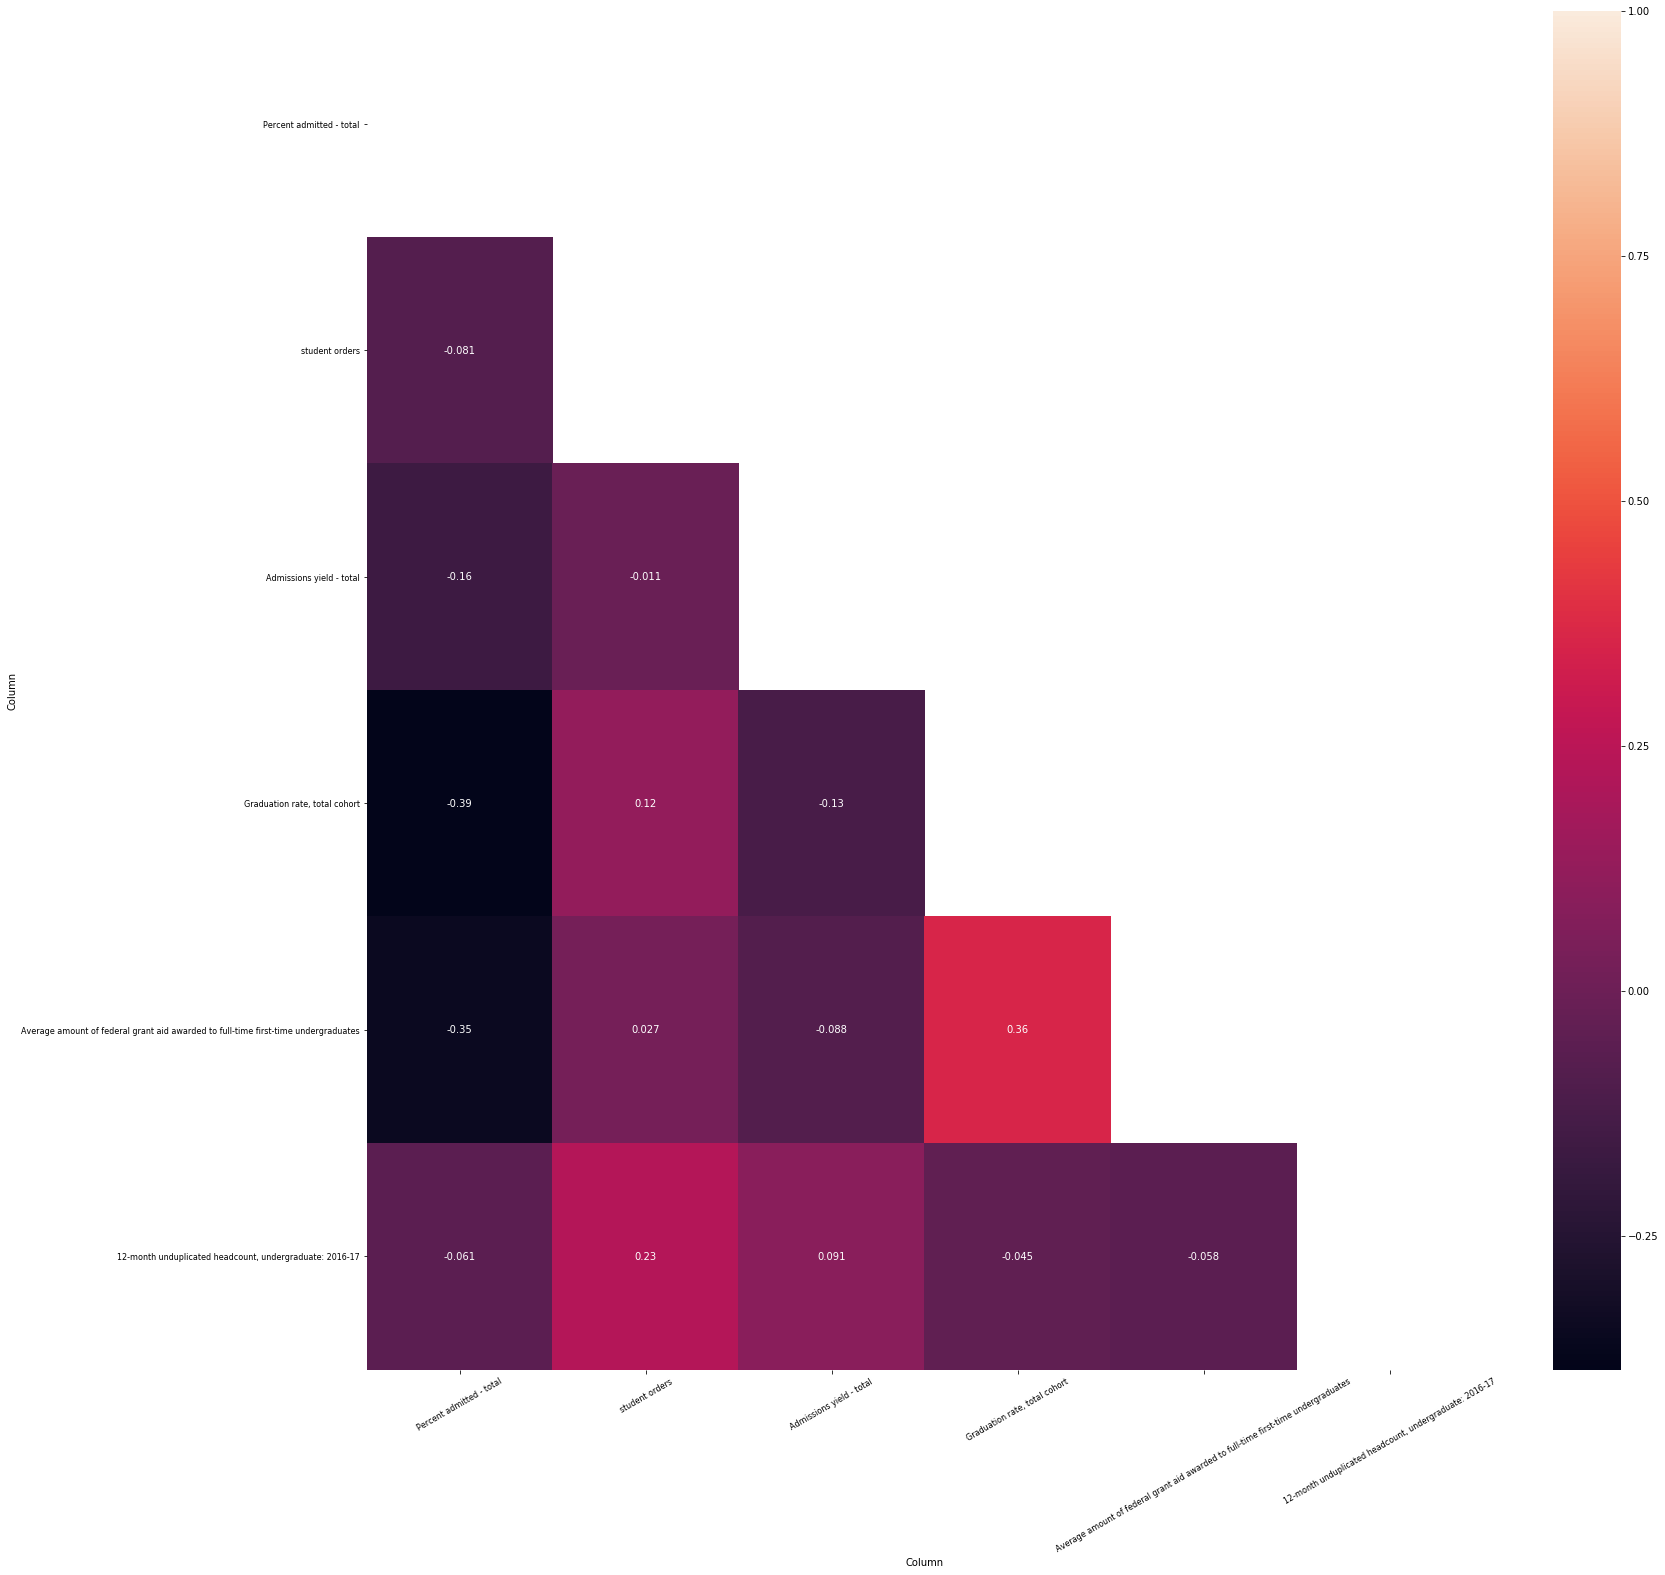

In [475]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25, 25))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

# The hypothesis is that financial aid, school size, graduation rate have a strong relatiionship with student orders.
potential_feature_cols = ['Percent admitted - total', 'student orders', 'Admissions yield - total', 'Graduation rate, total cohort', 'Average amount of federal grant aid awarded to full-time first-time undergraduates', '12-month unduplicated headcount, undergraduate: 2016-17']
correlation_heat_map(institutions[potential_feature_cols])

# It looks like the feature most strongly correlated with student orders is 12-month unduplicated headcount.
# This seems to suggest that as the school size increases, the number of student orders increases.

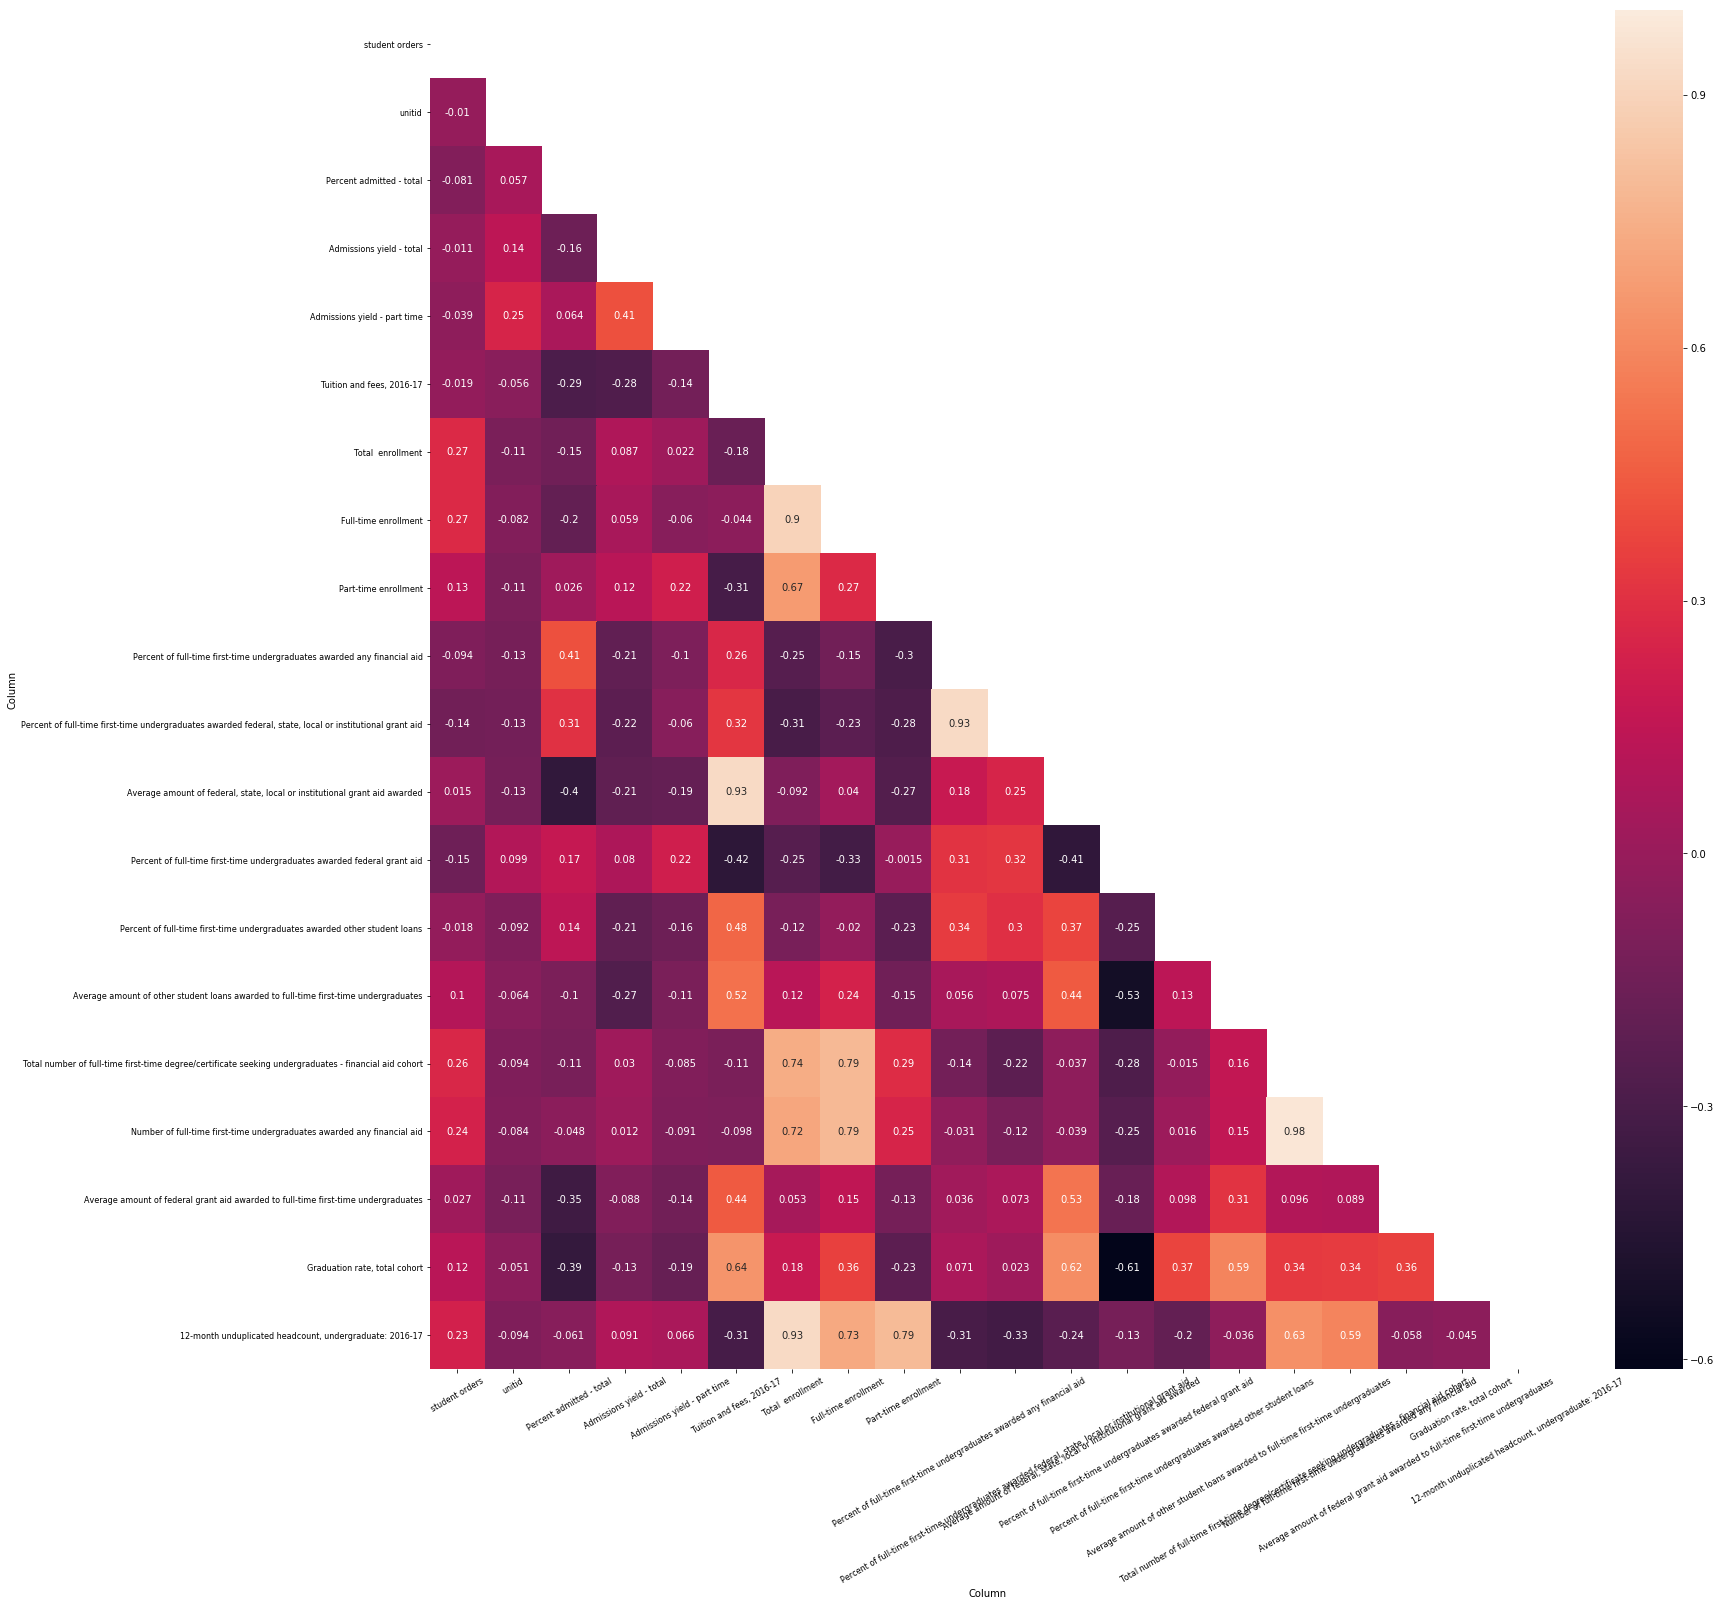

In [450]:
correlation_heat_map(institutions[institutions.columns.tolist()])

In [476]:
institutions.sort_values(["Percent admitted - total"]).head(5)
# Looking at the selectivity of the school vs student orders. 
# Stanford is one of the most selective, but has a relatively large amount of orders.

Column,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid","Average amount of federal, state, local or institutional grant aid awarded",Percent of full-time first-time undergraduates awarded federal grant aid,Percent of full-time first-time undergraduates awarded other student loans,Average amount of other student loans awarded to full-time first-time undergraduates,Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,Number of full-time first-time undergraduates awarded any financial aid,Average amount of federal grant aid awarded to full-time first-time undergraduates,"Graduation rate, total cohort","12-month unduplicated headcount, undergraduate: 2016-17"
747,7,448309,Shorter University-College of Adult & Professi...,Georgia,0.0,NaN,NaN,9680.0,"Private not-for-profit, 4-year or above",Four or more years,...,100.0,5109.0,100.0,0.0,NaN,4.0,4.0,4546.0,61.0,307.0
348,1,166027,Harvard University,Massachusetts,5.0,83.0,0.0,47074.0,"Private not-for-profit, 4-year or above",Four or more years,...,56.0,49870.0,15.0,8.0,6764.0,1665.0,1195.0,7389.0,96.0,13844.0
794,207,243744,Stanford University,California,5.0,82.0,0.0,47940.0,"Private not-for-profit, 4-year or above",Four or more years,...,50.0,50134.0,14.0,1.0,23157.0,1738.0,1161.0,5645.0,94.0,8402.0
201,3,190150,Columbia University in the City of New York,New York,7.0,61.0,0.0,55056.0,"Private not-for-profit, 4-year or above",Four or more years,...,52.0,49185.0,17.0,3.0,26052.0,1447.0,859.0,6968.0,95.0,8523.0
469,57,166683,Massachusetts Institute of Technology,Massachusetts,7.0,76.0,0.0,48452.0,"Private not-for-profit, 4-year or above",Four or more years,...,58.0,43248.0,17.0,4.0,11307.0,1115.0,940.0,7908.0,94.0,4680.0


In [452]:
institutions.columns.tolist()

['student orders',
 'unitid',
 'institution name',
 'FIPS state code',
 'Percent admitted - total',
 'Admissions yield - total',
 'Admissions yield - part time',
 'Tuition and fees, 2016-17',
 'Sector of institution',
 'Level of institution',
 'Total  enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Percent of full-time first-time undergraduates awarded any financial aid',
 'Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid',
 'Average amount of federal, state, local or institutional grant aid awarded',
 'Percent of full-time first-time undergraduates awarded federal grant aid',
 'Percent of full-time first-time undergraduates awarded other student loans',
 'Average amount of other student loans awarded to full-time first-time undergraduates',
 'Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort',
 'Number of full-time first-time undergraduates awarded any financial 

In [453]:
institutions.dtypes

Column
student orders                                                                                               int64
unitid                                                                                                       int64
institution name                                                                                            object
FIPS state code                                                                                             object
Percent admitted - total                                                                                   float64
Admissions yield - total                                                                                   float64
Admissions yield - part time                                                                               float64
Tuition and fees, 2016-17                                                                                  float64
Sector of institution                                                    

In [455]:
print("There are {} unique Level of institution values.".format(institutions['Level of institution'].nunique()))
print("There are {} unique Sector of institution values.".format(institutions['Sector of institution'].nunique()))

There are 3 unique Level of institution values.
There are 9 unique Sector of institution values.


In [485]:
# 'Sector of institution' and 'Level of institution' are categorical values, so I'm making dummy vars.
institutions['Sector of institution'].unique()

sectors_dummies = pd.get_dummies(institutions['Sector of institution'], prefix='sector')

sectors_dummies.sample(n=5, random_state=1)
sectors_dummies.drop(sectors_dummies.columns[0], axis=1, inplace=True)
sectors_dummies.sample(n=5, random_state=1)

institutions = pd.concat([institutions, sectors_dummies], axis=1)
institutions.sample(n=5, random_state=1)


,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"Graduation rate, total cohort","12-month unduplicated headcount, undergraduate: 2016-17","sector_Private for-profit, 2-year","sector_Private for-profit, 4-year or above","sector_Private for-profit, less-than 2-year","sector_Private not-for-profit, 2-year","sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year"
306,212,131469,George Washington University,District of Columbia,41.0,24.0,0.0,51950.0,"Private not-for-profit, 4-year or above",Four or more years,...,81.0,12358.0,0,0,0,0,1,0,0,0
707,16,152363,Saint Josephs College,Indiana,NaN,NaN,NaN,NaN,"Private not-for-profit, 4-year or above",Four or more years,...,NaN,NaN,0,0,0,0,1,0,0,0
126,1,129367,Capital Community College,Connecticut,NaN,NaN,NaN,4236.0,"Public, 2-year",At least 2 but less than 4 years,...,6.0,4950.0,0,0,0,0,0,1,0,0
691,1,207670,Rose State College,Oklahoma,NaN,NaN,NaN,3808.0,"Public, 2-year",At least 2 but less than 4 years,...,19.0,9667.0,0,0,0,0,0,1,0,0
874,1,103529,University of Alaska System of Higher Education,Alaska,NaN,NaN,NaN,NaN,Administrative Unit,Four or more years,...,NaN,NaN,0,0,0,0,0,0,0,0


In [486]:
institutions['Level of institution'].unique()

levels_dummies = pd.get_dummies(institutions['Level of institution'], prefix='level')

levels_dummies.sample(n=5, random_state=1)
levels_dummies.drop(levels_dummies.columns[0], axis=1, inplace=True)
levels_dummies.sample(n=5, random_state=1)

institutions = pd.concat([institutions, levels_dummies], axis=1)
institutions.sample(n=10, random_state=1)


,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"sector_Private for-profit, 2-year","sector_Private for-profit, 4-year or above","sector_Private for-profit, less-than 2-year","sector_Private not-for-profit, 2-year","sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate)
306,212,131469,George Washington University,District of Columbia,41.0,24.0,0.0,51950.0,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0
707,16,152363,Saint Josephs College,Indiana,NaN,NaN,NaN,NaN,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0
126,1,129367,Capital Community College,Connecticut,NaN,NaN,NaN,4236.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
691,1,207670,Rose State College,Oklahoma,NaN,NaN,NaN,3808.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
874,1,103529,University of Alaska System of Higher Education,Alaska,NaN,NaN,NaN,NaN,Administrative Unit,Four or more years,...,0,0,0,0,0,0,0,0,1,0
226,40,190664,CUNY Queens College,New York,43.0,22.0,0.0,6938.0,"Public, 4-year or above",Four or more years,...,0,0,0,0,0,0,1,0,1,0
741,8,199643,Shaw University,North Carolina,53.0,8.0,0.0,16580.0,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0
868,41,196088,University at Buffalo,New York,57.0,26.0,0.0,9574.0,"Public, 4-year or above",Four or more years,...,0,0,0,0,0,0,1,0,1,0
200,1,420556,Columbia Gorge Community College,Oregon,NaN,NaN,NaN,4068.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
133,129,183974,Centenary University,New Jersey,87.0,22.0,0.0,32098.0,"Private not-for-profit, 4-year or above",Four or more years,...,0,0,0,0,1,0,0,0,1,0


In [460]:
# Include dummy variables for season in the model.
from sklearn.linear_model import LinearRegression

feature_cols = [
#                 'Tuition and fees, 2016-17', 
#                 'Total  enrollment', 
#                 'Graduation rate, total cohort', 
#                 'Average amount of federal, state, local or institutional grant aid awarded',
                'sector_Private for-profit, 2-year',
                'sector_Private for-profit, 4-year or above',
                'sector_Private for-profit, less-than 2-year',
                'sector_Private not-for-profit, 2-year',
                'sector_Private not-for-profit, 4-year or above',
                'sector_Public, 2-year',
                'sector_Public, 4-year or above',
                'sector_Public, less-than 2-year',
                'level_Four or more years',
                'level_Less than 2 years (below associate)',
                'level_Four or more years',
                'level_Less than 2 years (below associate)']
X = institutions[feature_cols]
y = institutions['student orders']

# instantiate regressor
lr = LinearRegression()
# fit regression
lr.fit(X,y)
# predict student orders from sector and level dummy vars
y_preds = lr.predict(X)
y_preds[:5]

array([52.32054795, 98.80929095, 15.86111111,  1.        ,  1.        ])

In [461]:
from sklearn.metrics import mean_squared_error

print('null model RMSE: '+str(np.sqrt(mean_squared_error(y.map(lambda x: y.mean()),y))))
print('simple model RMSE: '+str(np.sqrt(mean_squared_error(y_preds,y))))

null model RMSE: 157.82779920329227
simple model RMSE: 155.5979838653461


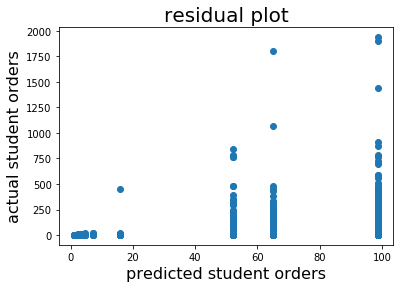

In [462]:
plt.title('residual plot', fontsize=20)
plt.xlabel('predicted student orders', fontsize=16)
plt.ylabel('actual student orders', fontsize=16)
plt.scatter(y_preds,y);

In [463]:
# How do I handle missing values?
print(institutions.isnull().sum())

institutions.columns[institutions.isna().any()].tolist()

student orders                                                                                               0
unitid                                                                                                       0
institution name                                                                                             0
FIPS state code                                                                                              0
Percent admitted - total                                                                                   450
Admissions yield - total                                                                                   451
Admissions yield - part time                                                                               451
Tuition and fees, 2016-17                                                                                   73
Sector of institution                                                                                        0
L

['Percent admitted - total',
 'Admissions yield - total',
 'Admissions yield - part time',
 'Tuition and fees, 2016-17',
 'Total  enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Percent of full-time first-time undergraduates awarded any financial aid',
 'Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid',
 'Average amount of federal, state, local or institutional grant aid awarded',
 'Percent of full-time first-time undergraduates awarded federal grant aid',
 'Percent of full-time first-time undergraduates awarded other student loans',
 'Average amount of other student loans awarded to full-time first-time undergraduates',
 'Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort',
 'Number of full-time first-time undergraduates awarded any financial aid',
 'Average amount of federal grant aid awarded to full-time first-time undergraduates',
 'Graduation rate, total coho

In [489]:
# 1) Try filling in missing values with mean

institutions_with_mean_for_na_values = institutions.copy()

institutions_with_mean_for_na_values.fillna(institutions_with_mean_for_na_values.mean(), inplace=True)

# Remaining missing values when using mean? No.
print(institutions_with_mean_for_na_values.isnull().sum())
institutions_with_mean_for_na_values.columns[institutions_with_mean_for_na_values.isna().any()].tolist()

institutions_with_mean_for_na_values.head(5)

institutions[institutions['Percent admitted - total'].isnull()]

# The missingness of "Percent admitted - total", "Admissions yield - total", "Admissions yield - part time"
# are strongly related. It looks like when one is missing, all three are missing for the institution.

student orders                                                                                             0
unitid                                                                                                     0
institution name                                                                                           0
FIPS state code                                                                                            0
Percent admitted - total                                                                                   0
Admissions yield - total                                                                                   0
Admissions yield - part time                                                                               0
Tuition and fees, 2016-17                                                                                  0
Sector of institution                                                                                      0
Level of institutio

,student orders,unitid,institution name,FIPS state code,Percent admitted - total,Admissions yield - total,Admissions yield - part time,"Tuition and fees, 2016-17",Sector of institution,Level of institution,...,"sector_Private for-profit, 2-year","sector_Private for-profit, 4-year or above","sector_Private for-profit, less-than 2-year","sector_Private not-for-profit, 2-year","sector_Private not-for-profit, 4-year or above","sector_Public, 2-year","sector_Public, 4-year or above","sector_Public, less-than 2-year",level_Four or more years,level_Less than 2 years (below associate)
2,1,172866,Academy College,Minnesota,NaN,NaN,NaN,17409.0,"Private for-profit, 4-year or above",Four or more years,...,0,1,0,0,0,0,0,0,1,0
3,1,483708,Access Careers,New York,NaN,NaN,NaN,NaN,"Private for-profit, less-than 2-year",Less than 2 years (below associate),...,0,0,1,0,0,0,0,0,0,1
4,1,480736,Ace Cosmetology and Barber Training Center,Connecticut,NaN,NaN,NaN,NaN,"Private for-profit, less-than 2-year",Less than 2 years (below associate),...,0,0,1,0,0,0,0,0,0,1
7,1,188438,Adirondack Community College,New York,NaN,NaN,NaN,4693.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
8,105,138716,Albany State University,Georgia,NaN,NaN,NaN,5490.0,"Public, 4-year or above",Four or more years,...,0,0,0,0,0,0,1,0,1,0
9,1,138682,Albany Technical College,Georgia,NaN,NaN,NaN,2654.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
13,19,172918,Alexandria Technical & Community College,Minnesota,NaN,NaN,NaN,5358.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
15,1,108807,Allan Hancock College,California,NaN,NaN,NaN,1346.0,"Public, 2-year",At least 2 but less than 4 years,...,0,0,0,0,0,1,0,0,0,0
19,2,188687,American Academy McAllister Institute of Funer...,New York,NaN,NaN,NaN,16568.0,"Private not-for-profit, 2-year",At least 2 but less than 4 years,...,0,0,0,1,0,0,0,0,0,0
20,2,232797,American National University,Virginia,NaN,NaN,NaN,14886.0,"Private for-profit, 4-year or above",Four or more years,...,0,1,0,0,0,0,0,0,1,0


In [425]:
# 2) Try filling in missing values with groupby mean

# institutions_with_mean_for_na_values = institutions
# institutions['Percent of full-time first-time undergraduates awarded any financial aid'] = institutions.groupby('Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid').transform(lambda x: x.fillna(x.mean()))


# institutions['Percent of full-time first-time undergraduates awarded any financial aid'] = institutions.groupby(['Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid'])['Percent of full-time first-time undergraduates awarded any financial aid']\
#     .transform(lambda x: x.fillna(x.mean()))

# institutions["Percent of full-time first-time undergraduates awarded any financial aid"] = institutions.groupby("Percent of full-time first-time undergraduates awarded federal, state, local or institutional grant aid")['Percent of full-time first-time undergraduates awarded any financial aid'].transform(lambda x: x.fillna(x.mean()))

# institutions['Percent of full-time first-time undergraduates awarded any financial aid'].fillna((institutions['Percent of full-time first-time undergraduates awarded any financial aid'].mean()))




In [464]:
# Create linear regression model using mean values.

# Include dummy variables for season in the model.
feature_cols = [
                'Tuition and fees, 2016-17', 
                'Total  enrollment', 
                'Graduation rate, total cohort', 
                'Average amount of federal, state, local or institutional grant aid awarded',
                'sector_Private for-profit, 2-year',
                'sector_Private for-profit, 4-year or above',
                'sector_Private for-profit, less-than 2-year',
                'sector_Private not-for-profit, 2-year',
                'sector_Private not-for-profit, 4-year or above',
                'sector_Public, 2-year',
                'sector_Public, 4-year or above',
                'sector_Public, less-than 2-year',
                'level_Four or more years',
                'level_Less than 2 years (below associate)',
                'level_Four or more years',
                'level_Less than 2 years (below associate)']
X = institutions_with_mean_for_na_values[feature_cols]
y = institutions_with_mean_for_na_values['student orders']

# instantiate regressor
lr = LinearRegression()
# fit regression
lr.fit(X,y)
# predict student orders from sector and level dummy vars
y_preds = lr.predict(X)

print('null model RMSE: '+str(np.sqrt(mean_squared_error(y.map(lambda x: y.mean()),y))))
print('simple model RMSE: '+str(np.sqrt(mean_squared_error(y_preds,y))))

null model RMSE: 157.82779920329227
simple model RMSE: 150.41801131498545


In [466]:
# Create linear regression model without mean values

# Include dummy variables for season in the model.
feature_cols = [
#                 'Tuition and fees, 2016-17', 
#                 'Total  enrollment', 
#                 'Graduation rate, total cohort', 
#                 'Average amount of federal, state, local or institutional grant aid awarded',
                'sector_Private for-profit, 2-year',
                'sector_Private for-profit, 4-year or above',
                'sector_Private for-profit, less-than 2-year',
                'sector_Private not-for-profit, 2-year',
                'sector_Private not-for-profit, 4-year or above',
                'sector_Public, 2-year',
                'sector_Public, 4-year or above',
                'sector_Public, less-than 2-year',
                'level_Four or more years',
                'level_Less than 2 years (below associate)',
                'level_Four or more years',
                'level_Less than 2 years (below associate)']
X = institutions[feature_cols]
y = institutions['student orders']

# instantiate regressor
lr = LinearRegression()
# fit regression
lr.fit(X,y)
# predict student orders from sector and level dummy vars
y_preds = lr.predict(X)

print('null model RMSE: '+str(np.sqrt(mean_squared_error(y.map(lambda x: y.mean()),y))))
print('simple model RMSE: '+str(np.sqrt(mean_squared_error(y_preds,y))))

null model RMSE: 157.82779920329227
simple model RMSE: 155.5979838653461
